<a href="https://colab.research.google.com/github/perfeus/API/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

import warnings
warnings.filterwarnings('ignore')

Прочитаем наш файл с исходными данными:

In [ ]:
# install and import gdown to download the datasets
!pip install -q gdown
import gdown

# Download the train dataset
gdown.download(
    'https://drive.google.com/uc?id=1X_EJEfERiXki0SKtbnCL9JDv49Go14lF',
    None,
    quiet=True
    )
# Unzip the train dataset
!unzip Project5_train_data.zip -d /content/data

# Download the train dataset
gdown.download(
    'https://drive.google.com/uc?id=1C2N2mfONpCVrH95xHJjMcueXvvh_-XYN',
    None,
    quiet=True
    )
# Unzip the train dataset
!unzip Project5_test_data.zip -d /content/data

# Download the holiday dataset
gdown.download('https://drive.google.com/uc?id=15iFiF2QWtJzyp07wfR5IKFUDJ2wR7t8S',
               '/content/data/holiday_data.csv',
               quiet=True
               )

# Download osrm train data
gdown.download(
    'https://drive.google.com/uc?id=1ecWjor7Tn3HP7LEAm5a0B_wrIfdcVGwR',
    None,
    quiet=True
)
# Unzip osrm train data
!unzip osrm_data_train.zip -d /content/data

# Download osrm test data
gdown.download(
    'https://drive.google.com/uc?id=1wCoS-yOaKFhd1h7gZ84KL9UwpSvtDoIA',
    None,
    quiet=True
)
# Unzip osrm test data
!unzip Project5_osrm_data_test.zip -d /content/data

# Download weather data
gdown.download(
    'https://drive.google.com/uc?id=1PH2Gk5--JSjpQyCGrNWYzT2MVx61c5bX',
    None,
    quiet=True
)
# Unzip weather data
!unzip weather_data.zip -d /content/data

In [3]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head(2)

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
# Преобразование признака pickup_datetime в тип данных datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Определение временных рамок данных
min_date = taxi_data['pickup_datetime'].min().date()
max_date = taxi_data['pickup_datetime'].max().date()

print(f"Временные рамки данных: с {min_date} по {max_date}")

Временные рамки данных: с 2016-01-01 по 2016-06-30


### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
# Подсчет пропущенных значений по всем столбцам таблицы
missing_values_count = taxi_data.isnull().sum().sum()

print(f"Количество пропущенных значений в данных: {missing_values_count}")

Количество пропущенных значений в данных: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [6]:
taxi_desc= taxi_data.describe()
print(taxi_desc)
# медианная длительность поездки
median_trip_duration = taxi_data['trip_duration'].median()
# средняя длительность поездки
mean_trip_duration = taxi_data['trip_duration'].mean().round()
# число уникальных таксопарков
taxi_unique = taxi_data['vendor_id'].unique()
print(f"Уникальные таксопарки: {len(taxi_unique)}")
print(f"Медианная длительность поездки: {median_trip_duration}")
print(f"Cредняя длительность поездки: {mean_trip_duration}")

# максимальное количество пассажиров
max_passenger_count = taxi_data['passenger_count'].max()

# минимальное время поездки и Максимальное время поездки
min_trip_duration = taxi_data['trip_duration'].min()
max_trip_duration = taxi_data['trip_duration'].max()

print(f"Максимальное количество пассажиров: {max_passenger_count}")
print(f"Минимальное время поездки: {min_trip_duration} секунд")
print(f"Максимальное время поездки: {max_trip_duration} секунд")

          vendor_id                pickup_datetime  passenger_count  \
count  1.458644e+06                        1458644     1.458644e+06   
mean   1.534950e+00  2016-04-01 10:10:24.940037120     1.664530e+00   
min    1.000000e+00            2016-01-01 00:00:17     0.000000e+00   
25%    1.000000e+00  2016-02-17 16:46:04.249999872     1.000000e+00   
50%    2.000000e+00            2016-04-01 17:19:40     1.000000e+00   
75%    2.000000e+00  2016-05-15 03:56:08.750000128     2.000000e+00   
max    2.000000e+00            2016-06-30 23:59:39     9.000000e+00   
std    4.987772e-01                            NaN     1.314242e+00   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      1.458644e+06     1.458644e+06       1.458644e+06      1.458644e+06   
mean      -7.397349e+01     4.075092e+01      -7.397342e+01      4.075180e+01   
min       -1.219333e+02     3.435970e+01      -1.219333e+02      3.218114e+01   
25%       -7.399187e+01     4.073735

Как видно из данных, максимальное число пассажиров 9, Максимальное время поездки 3526282, минимальное время поездки 1, уникальных таксопарков 2

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [7]:
# ваш код здесь
def add_datetime_features(df):
    """
    the function takes pandas dataframe and creates additional
    features from column 'pickup_datetime'
    """
    df['pickup_date'] = pd.to_datetime(df['pickup_datetime'].dt.date)
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

add_datetime_features(taxi_data)

taxi_data.describe(include=['object'])

,id,dropoff_datetime,store_and_fwd_flag,pickup_day_of_week
count,1458644,1458644,1458644,1458644
unique,1458644,1380377,2,7
top,id2875421,2016-02-19 19:25:04,N,Friday
freq,1,5,1450599,223533


In [8]:
print('Drives on Saturday:', taxi_data[taxi_data["pickup_day_of_week"] == "Saturday"].shape[0])
print('Mean number of drives by day:', round(taxi_data.groupby(taxi_data['pickup_date'])['id'].count().mean()))

Drives on Saturday: 220868
Mean number of drives by day: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [9]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

# ваш код здесь
def add_holiday_features(df1, df2):
    """
    the function takes two dataframes df1 and df2, if date from df1 is holiday
    then the value in a new column is 1 and 0 otherwise
    """
    holidays = set(pd.to_datetime(df2.date))
    df1['pickup_holiday'] = df1['pickup_date'].apply(lambda x: 1 if x in holidays else 0)

# apply the function to taxi_data
add_holiday_features(taxi_data, holiday_data)

print('Median duration within holidays:', taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median())

Median duration within holidays: 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [10]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')

# ваш код здесь
def add_osrm_features(df1, df2):
    """
    the function takes two dataframes and returns joined dataframe
    with all columns from df1 and columns total_distance,
    total_travel_time, number_of_steps from df2
    """
    joined_df = df1.merge(df2[['id', 'total_distance', 'total_travel_time', 'number_of_steps']],
                    left_on='id', right_on='id', how='outer')
    return joined_df

taxi_data = add_osrm_features(taxi_data, osrm_data)

print('Median difference:', round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median()))
print('Number of rows with NaN:', taxi_data[taxi_data.isna().any(axis=1)].shape[0])

Median difference: 372
Number of rows with NaN: 1


### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [11]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [12]:
# ваш код здесь
def add_geographical_features(df):
    """
    the function takes pandas dataframe as its argument and add two columns:
    Haversine distance and bearing angle
    """
    coord_df = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
    df['haversine_distance'] = coord_df.apply(lambda row: get_haversine_distance(row[0], row[1], row[2], row[3]), axis=1)
    df['direction'] = coord_df.apply(lambda row: get_angle_direction(row[0], row[1], row[2], row[3]), axis=1)

add_geographical_features(taxi_data)
print("Median haversine distance:", round(taxi_data['haversine_distance'].median(), 2))

Median haversine distance: 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [13]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(df, model):
    """
    the function takes pandas dataframe and clusterization algorithm
    and create one more column in the dataset with a number of cluster
    based on geo coordinates
    """
    coord_df = df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
    df['geo_cluster'] = coord_df.apply(lambda row: model.predict([row])[0], axis=1)

add_cluster_features(taxi_data, kmeans)
print('The lowest number in a cluster:', taxi_data['geo_cluster'].value_counts(ascending=True).iloc[0])

The lowest number in a cluster: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [14]:
weather_data = pd.read_csv('data/weather_data.csv')
# ваш код здесь
def add_weather_features(df1, df2):
    """
    the function takes two pandas dataframes, process features from df2 and
    add them to df1
    """

    # Преобразуем столбец time в тип datetime и извлекаем дату и час
    df2['time'] = pd.to_datetime(df2['time'], format='%Y-%m-%d %H:%M:%S')
    df2['date'] = pd.to_datetime(df2['time'].dt.date)
    df2['hour'] = df2['time'].dt.hour

    # # Удаляем неинтересующие столбцы из таблицы weather_data
    df2.drop(columns=['time', 'windchill', 'heat index', 'humidity', 'pressure', 'dew Point', 'wind dir',
       'gust speed', 'conditions'], inplace=True)

    # # Объединяем таблицу с данными о поездках с таблицей с данными о погодных условиях
    joined_df = df1.merge(df2, left_on=['pickup_date', 'pickup_hour'], right_on=['date', 'hour'], how='left')

    # # Удаляем столбцы date и hour, которые были созданы
    joined_df.drop(columns=['date', 'hour'], inplace=True)

    return joined_df

taxi_data = add_weather_features(taxi_data, weather_data)

In [15]:
print('Drives number with snow:', taxi_data[taxi_data['events'] == 'Snow'].shape[0])
print('Ratio of missing values:',
      round(100 * taxi_data[['temperature', 'visibility', 'wind speed', 'precip', 'events']].isna().all(axis=1).sum() / len(taxi_data), 2)
    )

Drives number with snow: 13126
Ratio of missing values: 0.82


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [16]:
# ваш код здесь
def fill_null_weather_data(data):
    # Заполняем пропуски в столбцах с погодными условиями медианным значением
    for col in ['temperature', 'visibility', 'wind speed', 'precip']:
        data[col] = data[col].fillna(
            data.groupby('pickup_date')[col].transform('median')
        )

    # Заполняем пропуски в столбце events строкой 'None'
    data['events'] = data['events'].fillna('None')

    # Заполняем пропуски в столбцах с информацией из OSRM API медианным значением
    for col in ['total_distance', 'total_travel_time', 'number_of_steps']:
        data[col] = data[col].fillna(data[col].median())

    return data
data_taxi_filled = fill_null_weather_data(taxi_data)
median_temperature = data_taxi_filled['temperature'].median()
print(f"Медиана в столбце temperature после заполнения пропусков: {median_temperature:.1f}")

Медиана в столбце temperature после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


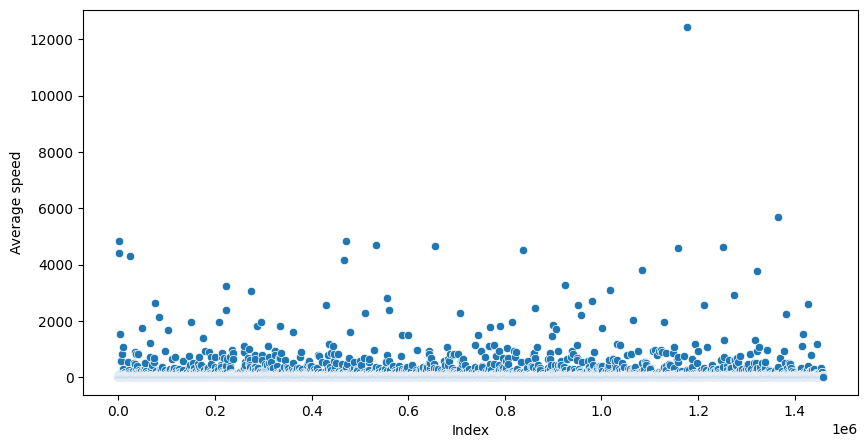

In [17]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [18]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458644, 26)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events'],
      dtype='object')


In [19]:
# Находим поездки с длительностью более 24 часов
outliers_duration = taxi_data[taxi_data['trip_duration'] > 24*60*60]

# Удаляем выбросы из набора данных
taxi_data = taxi_data.drop(outliers_duration.index)

# Выводим количество удаленных выбросов
print("Количество выбросов по длительности поездки, удаленных из набора данных:", len(outliers_duration))

Количество выбросов по длительности поездки, удаленных из набора данных: 4


In [20]:
# Рассчитываем среднюю скорость по кратчайшему пути в км/ч
taxi_data['average_speed_kmph'] = taxi_data['total_distance'] / (taxi_data['trip_duration'] / 3.6)

# Находим поездки со средней скоростью более 300 км/ч и удаляем признак из набота данных
outliers_speed = taxi_data[taxi_data['average_speed_kmph'] > 300]
taxi_data.drop('average_speed_kmph', axis=1, inplace=True)

# Удаляем выбросы из набора данных
taxi_data = taxi_data.drop(outliers_speed.index)

# Выводим количество удаленных выбросов
print("Количество выбросов по скорости, удаленных из набора данных:", len(outliers_speed))

# Сохраняем очищенный датасет в CSV
taxi_data.to_csv('/content/final_data.csv', index=False)

Количество выбросов по скорости, удаленных из набора данных: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [21]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

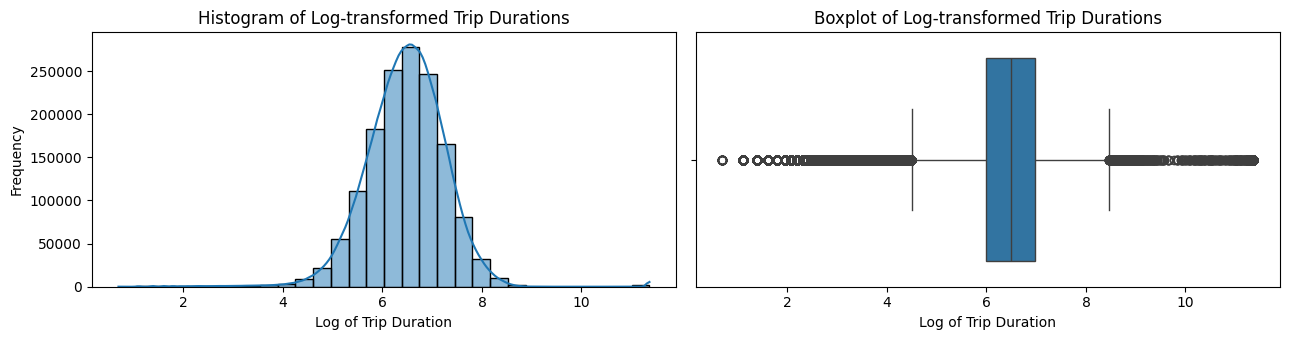


Statistic: 138350.16605405, p-value: 0.0
The null hypothesis of normality is rejected. The distribution is not normal.


In [22]:
# ваш код здесь
plt.figure(figsize=(13, 3.5))

plt.subplot(1, 2, 1)
sns.histplot(taxi_data['trip_duration_log'], bins=30, kde=True)
plt.title('Histogram of Log-transformed Trip Durations')
plt.xlabel('Log of Trip Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=taxi_data['trip_duration_log'])
plt.title('Boxplot of Log-transformed Trip Durations')
plt.xlabel('Log of Trip Duration')

plt.tight_layout()
plt.show()

from scipy.stats import normaltest
stat, p_value = normaltest(taxi_data['trip_duration_log'])
alpha = 0.05

print(f'\nStatistic: {stat}, p-value: {p_value}')
if p_value < alpha:
    print("The null hypothesis of normality is rejected. The distribution is not normal.")
else:
    print("The null hypothesis of normality cannot be rejected. The distribution is normal.")

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

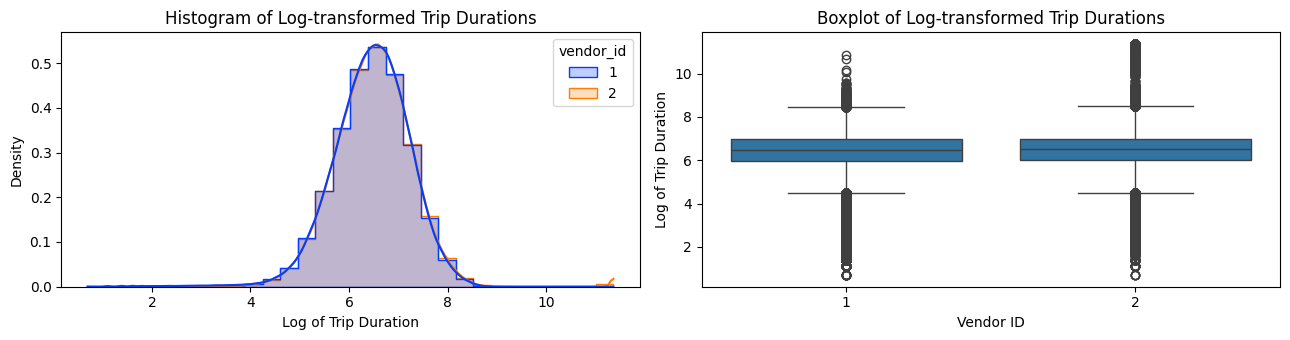

In [23]:
# ваш код здесь
palette = sns.color_palette("bright", len(taxi_data['vendor_id'].unique()))
plt.figure(figsize=(13, 3.5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data=taxi_data, x='trip_duration_log', hue='vendor_id', bins=30, kde=True,
             element="step", stat="density", common_norm=False, palette=palette
             )
plt.title('Histogram of Log-transformed Trip Durations')
plt.xlabel('Log of Trip Duration')
plt.ylabel('Density')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x='vendor_id', y='trip_duration_log', data=taxi_data)
plt.title('Boxplot of Log-transformed Trip Durations')
plt.xlabel('Vendor ID')
plt.ylabel('Log of Trip Duration')

plt.tight_layout()
plt.show()

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

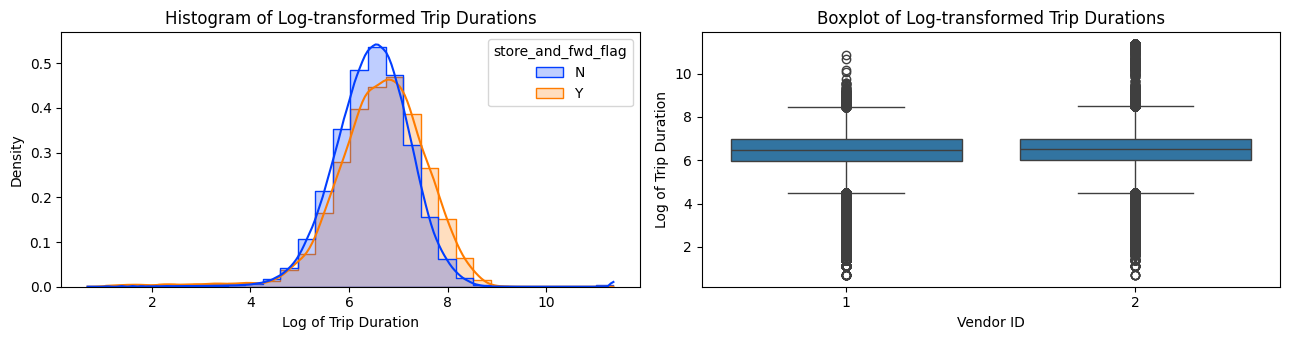

In [24]:
# ваш код здесь
palette = sns.color_palette("bright", len(taxi_data['store_and_fwd_flag'].unique()))
plt.figure(figsize=(13, 3.5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(data=taxi_data, x='trip_duration_log', hue='store_and_fwd_flag', bins=30, kde=True,
             element="step", stat="density", common_norm=False, palette=palette
             )
plt.title('Histogram of Log-transformed Trip Durations')
plt.xlabel('Log of Trip Duration')
plt.ylabel('Density')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x='vendor_id', y='trip_duration_log', data=taxi_data)
plt.title('Boxplot of Log-transformed Trip Durations')
plt.xlabel('Vendor ID')
plt.ylabel('Log of Trip Duration')

plt.tight_layout()
plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

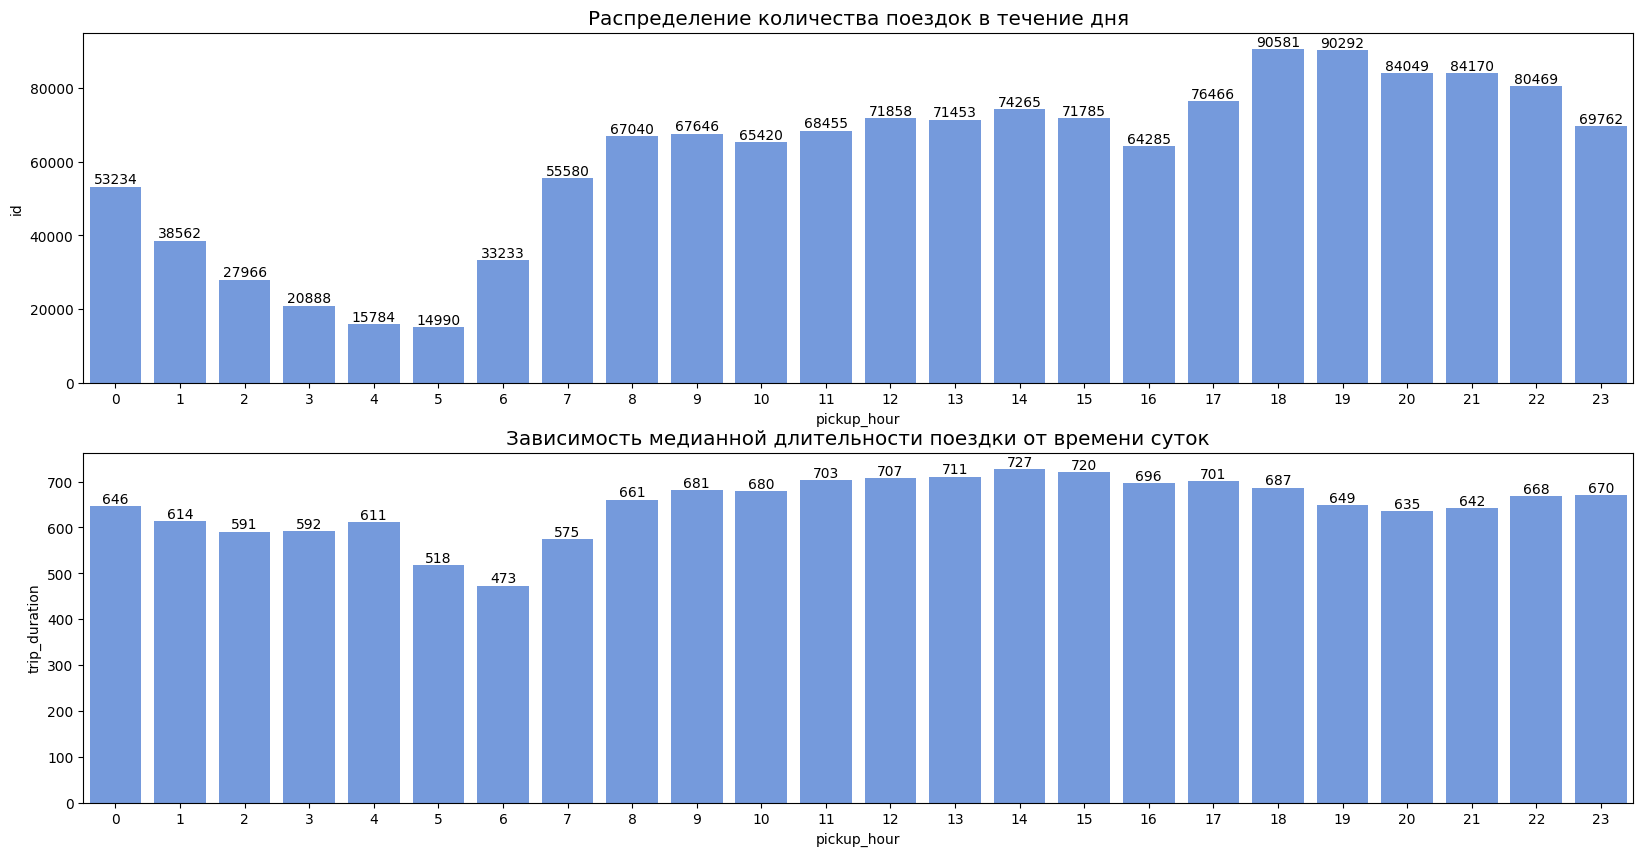

In [25]:
# Формат отображение
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
plt.style.use('ggplot')

# Данные
df1 = taxi_data.groupby(by='pickup_hour', as_index=False).count();
df2 = taxi_data.groupby(by='pickup_hour', as_index=False).agg({'trip_duration':'median'});

# Оцениваем количество заказов такси в течение суток
barplot = sns.barplot(
    data=df1,
    x=df1.iloc[:, 0],
    y=df1.iloc[:, 1],
    color='cornflowerblue',
    ax=axes[0]);
barplot.set_title('Распределение количества поездок в течение дня');
barplot.bar_label(barplot.containers[0]);

# Оцениваем продолжительность поездки в зависимости от времени
barplot = sns.barplot(
    data=df2,
    x=df2.iloc[:, 0],
    y=df2.iloc[:, 1],
    color='cornflowerblue',
    ax=axes[1]);
barplot.set_title('Зависимость медианной длительности поездки от времени суток');
barplot.bar_label(barplot.containers[0]);

# Задаем цвет для подписей
plt.rcParams.update({'text.color': "black"})

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


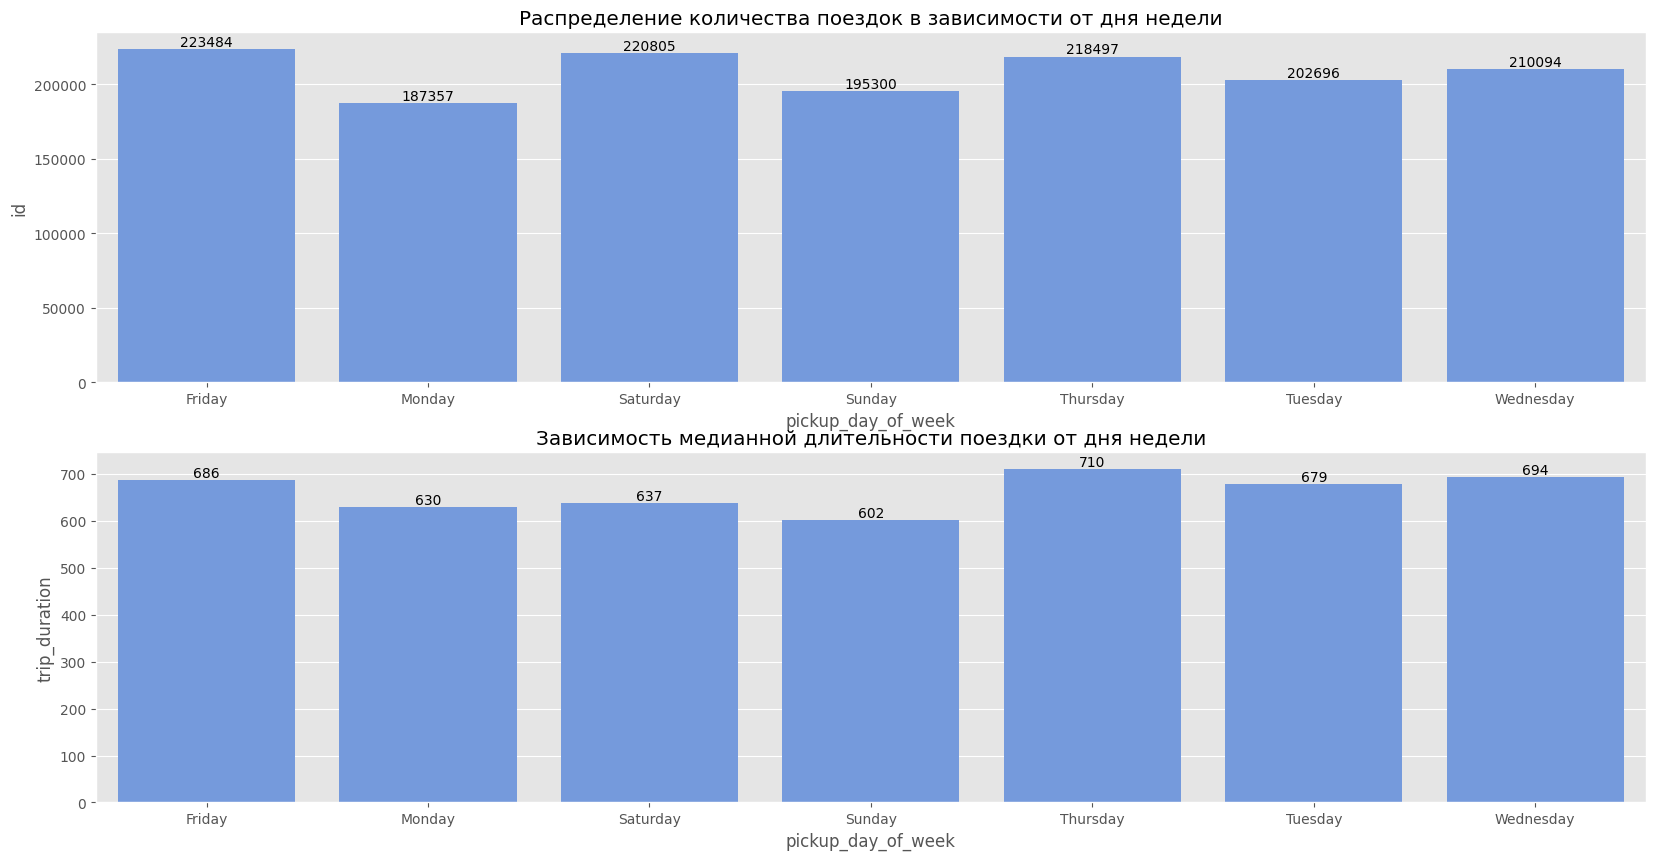

In [26]:
# Формат отображение
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
plt.style.use('ggplot')

# Данные
df1 = taxi_data.groupby(by='pickup_day_of_week', as_index=False).count()
df2 = taxi_data.groupby(by='pickup_day_of_week', as_index=False).agg({'trip_duration':'median'})

# Оцениваем количество заказов такси в течение недели
barplot = sns.barplot(
    data=df1,
    x=df1.iloc[:, 0],
    y=df1.iloc[:, 1],
    color='cornflowerblue',
    ax=axes[0])
barplot.set_title('Распределение количества поездок в зависимости от дня недели');

# Оцениваем продолжительность поездки в зависимости от дня недели
barplot.bar_label(barplot.containers[0]);
barplot = sns.barplot(
    data=df2,
    x=df2.iloc[:, 0],
    y=df2.iloc[:, 1],
    color='cornflowerblue',
    ax=axes[1]);
barplot.set_title('Зависимость медианной длительности поездки от дня недели');
barplot.bar_label(barplot.containers[0]);

# Задаем цвет для подписей
plt.rcParams.update({'text.color': "black"})

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

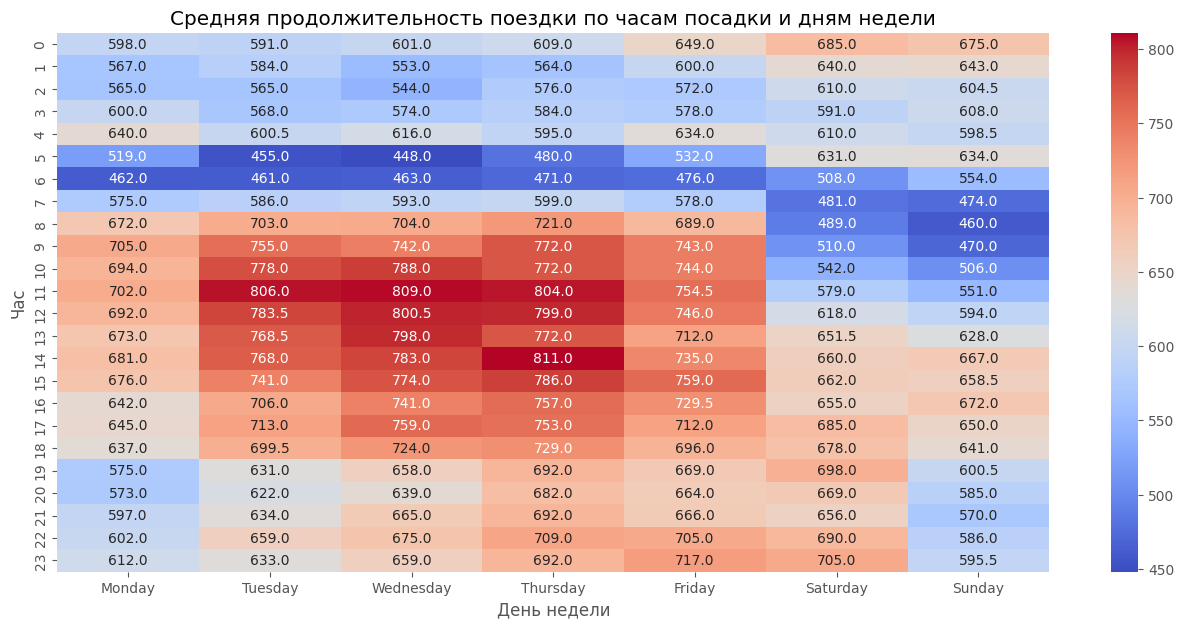

In [27]:
# ваш код здесь
pivot_data = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
)
# Define the order of the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the columns of the pivot table
pivot_data = pivot_data[days_of_week]

# Plot the heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Средняя продолжительность поездки по часам посадки и дням недели')
plt.xlabel('День недели')
plt.ylabel('Час')
plt.xticks(ticks=np.arange(len(days_of_week)) + 0.5, labels=days_of_week)
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


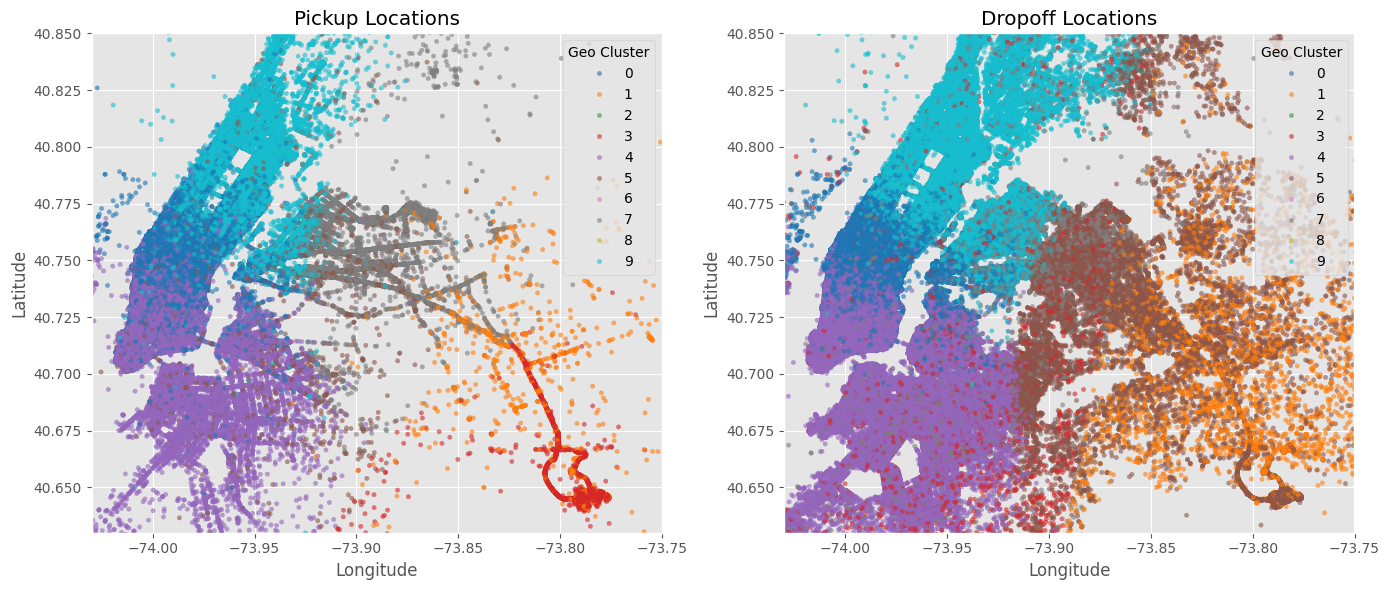

In [28]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь
# Создание диаграмм рассеяния
plt.figure(figsize=(14, 6))

# Первая диаграмма - точки начала поездок
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    data=taxi_data,
    palette='tab10',
    s=10,
    alpha=0.6,
    edgecolor=None
)
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.legend(title='Geo Cluster')

# Вторая диаграмма - точки завершения поездок
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    data=taxi_data,
    palette='tab10',
    s=10,
    alpha=0.6,
    edgecolor=None
)
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.legend(title='Geo Cluster')

plt.tight_layout()
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [29]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [30]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


**Ответы:**

а) Уникальным для каждой поездки является её идентификатор — столбец id. Он никак не связан с длительностью поездки и не имеет значения при её прогнозировании.
б) Утечка данных (data leak) — это ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.
в) В наших данных утечку создаёт признак dropoff_datetime — зафиксированное время остановки счётчика. Начиная поездку, мы никак не можем точно знать, когда она закончится, ведь мы как раз и пытаемся предсказать время окончания поездки.

In [31]:
# ваш код здесь
train_data.drop(['id', 'dropoff_datetime'], axis=1, inplace=True)
print('Shape of data: {}'.format(train_data.shape))
print('Columns: {}'.format(train_data.columns))

Shape of data: (1458233, 25)
Columns: Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_hour',
       'pickup_day_of_week', 'pickup_holiday', 'total_distance',
       'total_travel_time', 'number_of_steps', 'haversine_distance',
       'direction', 'geo_cluster', 'temperature', 'visibility', 'wind speed',
       'precip', 'events', 'trip_duration_log'],
      dtype='object')


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [32]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [33]:
# Закодировать признак vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# Закодировать признак store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Рассчитать среднее по закодированному столбцу vendor_id
mean_vendor_id = train_data['vendor_id'].mean()

# Рассчитать среднее по закодированному столбцу store_and_fwd_flag
mean_store_and_fwd_flag = train_data['store_and_fwd_flag'].mean()

print("Среднее по закодированному столбцу vendor_id:", round(mean_vendor_id, 2))
print("Среднее по закодированному столбцу store_and_fwd_flag:", round(mean_store_and_fwd_flag, 3))

Среднее по закодированному столбцу vendor_id: 0.53
Среднее по закодированному столбцу store_and_fwd_flag: 0.006


In [34]:
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [35]:
from sklearn.preprocessing import OneHotEncoder

# Создание объекта OneHotEncoder с указанными параметрами
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Выбор категориальных признаков из train_data
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
categorical_features = train_data[columns_to_change]

# Преобразование категориальных признаков в закодированный формат
data_onehot = one_hot_encoder.fit_transform(categorical_features)

# Получение имен закодированных столбцов
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

# Преобразование numpy-массива в DataFrame
data_onehot = pd.DataFrame(data_onehot.toarray(), columns=column_names)

# Вывод информации о количестве сгенерированных бинарных столбцов
num_binary_columns = data_onehot.shape[1]
print("Количество сгенерированных бинарных столбцов:", num_binary_columns)

Количество сгенерированных бинарных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [36]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1),
    data_onehot], axis=1
)

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [37]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [38]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(X, y_log, test_size=0.33, random_state=42)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [39]:
# ваш код здесь
from sklearn.feature_selection import SelectKBest, f_regression

# Создание объекта SelectKBest с указанными параметрами
selector = SelectKBest(score_func=f_regression, k=25)

# Применение отбора признаков к обучающей выборке
X_train_selected = selector.fit_transform(X_train, y_train_log)

# Получение индексов отобранных признаков
selected_indices = selector.get_support(indices=True)

# Получение имен отобранных признаков
selected_features = X.columns[selected_indices]

# Вывод информации об отобранных признаках
print("Отобранные признаки:", selected_features)


Отобранные признаки: Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'temperature',
       'pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday',
       'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
       'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
       'geo_cluster_9'],
      dtype='object')


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [40]:
# ваш код здесь
from sklearn.preprocessing import MinMaxScaler

# cоздаем трансформер и обучаем на обучающей выборке с отобранными признаками
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
# преобразовываем валидационную выборку с отобранными признаками
X_valid_scaled = scaler.transform(X_valid[selected_features])

print('Среднее для первого предиктора:', round(X_valid_scaled[:, 0].mean(), 2))

Среднее для первого предиктора: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



In [49]:
# сохраняем обработанные данные
X_train.to_csv('X_train.csv', index=False)
y_train_log.to_csv('y_train_log.csv', index=False)
X_valid.to_csv('X_valid.csv', index=False)
y_valid_log.to_csv('y_valid_log.csv', index=False)

In [50]:
# загружаем обработанные данные
X_train, y_train_log = pd.read_csv('X_train.csv'), pd.read_csv('y_train_log.csv')
X_valid, y_valid_log = pd.read_csv('X_valid.csv'), pd.read_csv('y_valid_log.csv')

In [51]:
# сохраняем нормализованные данные
np.savetxt('X_train_scaled.csv', X_train_scaled, delimiter=',')
np.savetxt('X_valid_scaled.csv', X_valid_scaled, delimiter=',')

In [52]:
# загружаем нормализованные данные
X_train_scaled = np.loadtxt('X_train_scaled.csv', delimiter=',')
X_valid_scaled = np.loadtxt('X_valid_scaled.csv', delimiter=',')

### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [12]:
# ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# создадим и обучим модель линейной регрессии
model_LR = LinearRegression()
model_LR.fit(X_train_scaled, y_train_log)
print(f'RMSLE тренеровочной выборки: {rmsle(y_train_log, model_LR.predict(X_train_scaled)):.2f}')
print(f'RMSLE валидационной выборки: {rmsle(y_valid_log, model_LR.predict(X_valid_scaled)):.2f}')

RMSLE тренеровочной выборки: 0.54
RMSLE валидационной выборки: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [13]:
# ваш код здесь
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Создание и обучение модели
model_PR = LinearRegression()
model_PR.fit(X_train_poly, y_train_log)

# Расчет RMSLE для обучающей и валидационной выборок
print(f'RMSLE обучающей выборки: {rmsle(y_train_log, model_PR.predict(X_train_poly)):.2f}')
X_valid_poly = poly.transform(X_valid_scaled)
print(f'RMSLE валидационной выборки: {rmsle(y_valid_log, model_PR.predict(X_valid_poly)):.2f}')

RMSLE обучающей выборки: 0.47
RMSLE валидационной выборки: 0.70


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [14]:
# ваш код здесь
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

# Создание и обучение модели с L2-регуляризацией
model_Ridge = Ridge(alpha=1)
model_Ridge.fit(X_train_poly, y_train_log)

# Расчет RMSLE для обучающей и валидационной выборок
print(f'RMSLE обучающей выборки: {rmsle(y_train_log, model_Ridge.predict(X_train_poly)):.2f}')
X_valid_poly = poly.transform(X_valid_scaled)
print(f'RMSLE валидационной выборки: {rmsle(y_valid_log, model_Ridge.predict(X_valid_poly)):.2f}')

RMSLE обучающей выборки: 0.48
RMSLE валидационной выборки: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [15]:
# ваш код здесь
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train_scaled, y_train_log)

# Расчет RMSLE для обучающей и валидационной выборок
print(f'RMSLE обучающей выборки: {rmsle(y_train_log, model_DT.predict(X_train_scaled)):.2f}')
print(f'RMSLE валидационной выборки: {rmsle(y_valid_log, model_DT.predict(X_valid_scaled)):.2f}')

RMSLE обучающей выборки: 0.00
RMSLE валидационной выборки: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


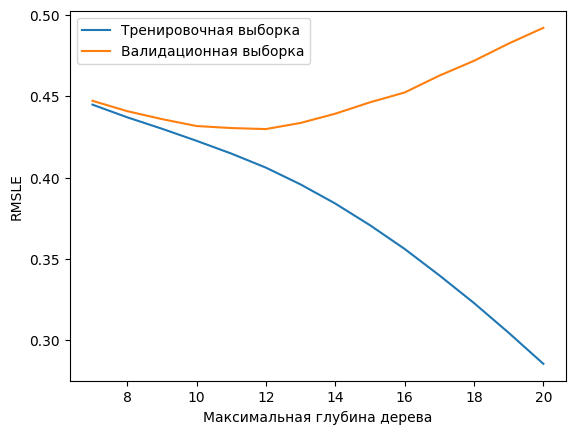

Оптимальное значение максимальной глубины дерева: 12
RMSLE тренировочной выборки: 0.41
RMSLE валидационной выборки: 0.43


In [16]:
max_depths = range(7, 21)
rmsle_metrics = {}
# обучаем модель и сохраняем результаты предсказания
for max_depth in max_depths:
    model_DTR = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model_DTR.fit(X_train_scaled, y_train_log)

    rmsle_metrics[max_depth] = [
        rmsle(y_train_log, model_DTR.predict(X_train_scaled)),
        rmsle(y_valid_log, model_DTR.predict(X_valid_scaled))
    ]

# визуализируем результы обучения модели
plt.plot(rmsle_metrics.keys(), np.array(list(rmsle_metrics.values()))[:, 0], label='Тренировочная выборка')
plt.plot(rmsle_metrics.keys(), np.array(list(rmsle_metrics.values()))[:, 1], label='Валидационная выборка')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSLE')
plt.legend()
plt.show()

print(f'Оптимальное значение максимальной глубины дерева: 12')
print(f'RMSLE тренировочной выборки: {rmsle_metrics[12][0]:.2f}')
print(f'RMSLE валидационной выборки: {rmsle_metrics[12][1]:.2f}')

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [17]:
# ваш код здесь
from sklearn.ensemble import RandomForestRegressor

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

model = RandomForestRegressor(n_estimators=200,
                                max_depth=12,
                                criterion='squared_error',
                                min_samples_split=20,
                                random_state=42)
model.fit(X_train_scaled, y_train_log)

y_train_pred = model.predict(X_train_scaled)
rmsle_train = rmsle(y_train_log, y_train_pred)

y_valid_pred = model.predict(X_valid_scaled)
rmsle_valid = rmsle(y_valid_log, y_valid_pred)

print(f'RMSLE тренировочной выборки: {rmsle_train:.2f}')
print(f'RMSLE валидационной выборки: {rmsle_valid:.2f}')

RMSLE тренировочной выборки: 0.40
RMSLE валидационной выборки: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [42]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Функция для вычисления RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Создаем и обучаем модель градиентного бустинга
model_GBR = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
model_GBR.fit(X_train_scaled, y_train_log)
print(f'RMSLE тренеровочной выборки: {rmsle(y_train_log, model_GBR.predict(X_train_scaled)):.2f}')
print(f'RMSLE валидационной выборки: {rmsle(y_valid_log, model_GBR.predict(X_valid_scaled)):.2f}')

RMSLE тренеровочной выборки: 0.37
RMSLE валидационной выборки: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


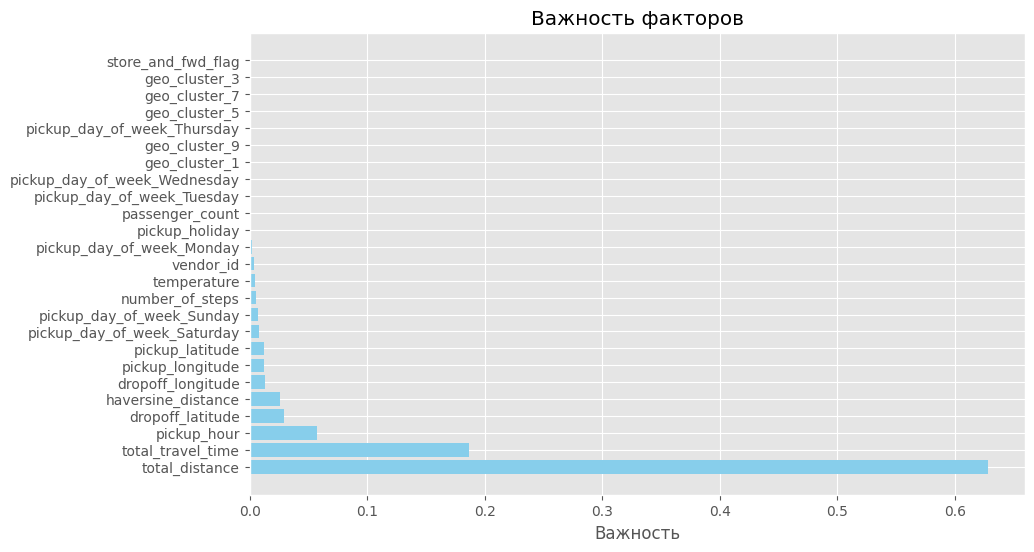

Топ-3 наиболее важных факторов:
              Feature  Importance
9      total_distance    0.628211
10  total_travel_time    0.186307
7         pickup_hour    0.057439


In [62]:
# ваш код здесь
# Получаем список коэффициентов
feature_importances = model_GBR.feature_importances_
selected_features = [
    'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
    'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time',
    'number_of_steps', 'haversine_distance', 'temperature',
    'pickup_day_of_week_Monday', 'pickup_day_of_week_Saturday',
    'pickup_day_of_week_Sunday', 'pickup_day_of_week_Thursday',
    'pickup_day_of_week_Tuesday', 'pickup_day_of_week_Wednesday',
    'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
    'geo_cluster_9'
]
# создаем таблицу коэффициентов
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Сортируем коэффициенты по значимости
importance_df = importance_df.sort_values(by='Importance')

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.title('Важность факторов')
plt.gca().invert_yaxis()
plt.show()

# Определяем топ-3 наиболее значимых факторов
top_3_features = importance_df.sort_values(by='Importance', ascending=False).head(3)
print("Топ-3 наиболее важных факторов:")
print(top_3_features)

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [59]:
# ваш код здесь
from sklearn.metrics import median_absolute_error as mae
print(f'RMSLE тренеровочной выборки: {(mae(np.exp(y_train_log) - 1, np.exp(model_GBR.predict(X_train_scaled)) - 1)) / 60:.1f}')
print(f'RMSLE валидационной выборки: {(mae(np.exp(y_valid_log) - 1, np.exp(model_GBR.predict(X_valid_scaled)) - 1)) / 60:.1f}')

RMSLE тренеровочной выборки: 1.81
RMSLE валидационной выборки: 1.83


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [148]:
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [149]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
add_datetime_features(test_data)
add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
add_geographical_features(test_data)
add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)
test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data.drop(['id', 'pickup_datetime', 'pickup_date'], axis=1, inplace=True)

test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)

X_test = test_data[selected_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

y_test_predict = np.exp(model_GBR.predict(X_test_scaled)) - 1

Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [150]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost catboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)